In [81]:
import numpy as np
import pandas as pd
from collections import Counter

In [82]:
df=pd.read_csv(r"C:\Users\prabh\Downloads\data\listing_with_id.csv")

In [83]:
# Convert month column to the desired format (YYYY-MM-DD)
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')

In [84]:
print(df.describe())


                 id   accommodates  bathrooms_text       bedrooms  \
count  2.485080e+05  248508.000000    248376.00000  246462.000000   
mean   4.730988e+17       3.130680         1.28622       1.462448   
min    1.419000e+03       1.000000         0.00000       0.000000   
25%    2.921722e+07       2.000000         1.00000       1.000000   
50%    6.165161e+17       2.000000         1.00000       1.000000   
75%    9.267256e+17       4.000000         1.50000       2.000000   
max    1.238623e+18      16.000000        49.00000      50.000000   
std    4.659255e+17       1.998167         0.61261       0.928123   

                beds          price  minimum_nights  maximum_nights  \
count  248308.000000  248470.000000   248508.000000   248508.000000   
mean        1.667307     186.225747       25.117779      496.287689   
min         0.000000       1.000000        1.000000        1.000000   
25%         1.000000      80.000000        3.000000       90.000000   
50%         1.000000   

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248508 entries, 0 to 248507
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              248508 non-null  int64         
 1   neighbourhood_cleansed          248508 non-null  object        
 2   property_type                   248508 non-null  object        
 3   accommodates                    248508 non-null  int64         
 4   bathrooms_text                  248376 non-null  float64       
 5   bedrooms                        246462 non-null  float64       
 6   beds                            248308 non-null  float64       
 7   price                           248470 non-null  float64       
 8   minimum_nights                  248508 non-null  int64         
 9   maximum_nights                  248508 non-null  int64         
 10  minimum_nights_avg_ntm          248508 non-null  float64

In [86]:
# Count the occurrences of each id
id_counts = df['id'].value_counts()

# Now count the occurrences of those counts
count_counts = Counter(id_counts.values)

# Print the results
print("ID counts:", id_counts)
print("Count of counts:", count_counts)

ID counts: id
1419                   12
591207290192401504     12
591369137852604608     12
591397142894564511     12
591842200761146274     12
                       ..
1236909153245922872     1
1236847415192350469     1
1047050436086963691     1
1050981754623499159     1
993329579328605342      1
Name: count, Length: 32128, dtype: int64
Count of counts: Counter({12: 13068, 1: 3472, 2: 2703, 3: 2091, 4: 1893, 6: 1621, 5: 1501, 7: 1258, 8: 1225, 11: 1185, 10: 1098, 9: 1013})


In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
# Define your dataframe 'df' here

# Create 'Price_Range' column
bins = [0, 150, 300, 500, 1000, df['price'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Price_Range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Split the dataset into five DataFrames
df_1 = df[df['Price_Range'] == 'Very Low']
df_2 = df[df['Price_Range'] == 'Low']
df_3 = df[df['Price_Range'] == 'Medium']
df_4 = df[df['Price_Range'] == 'High']
df_5 = df[df['Price_Range'] == 'Very High']

# You can store these DataFrames in a dictionary for convenience
price_range_dfs = {
  'Very Low': df_1,
  'Low': df_2,
  'Medium': df_3,
  'High': df_4,
  'Very High': df_5
}

In [89]:
# Encode 'property' if necessary
if df['property'].dtype == 'object':
      df['property'] = df['property'].astype('category').cat.codes

# Encode 'neighbourhood_cleansed' and 'property_type'
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category').cat.codes
df['property_type'] = df['property_type'].astype('category').cat.codes



Processing Price Range: Very Low


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\237809045.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2116/2116 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 52.4506 - val_loss: 27.1344
Epoch 2/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 27.2227 - val_loss: 21.0033
Epoch 3/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 20.5712 - val_loss: 20.0187
Epoch 4/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 20.0132 - val_loss: 19.6794
Epoch 5/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 19.7106 - val_loss: 19.5769
Epoch 6/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 19.4075 - val_loss: 19.3539
Epoch 7/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 19.1162 - val_loss: 19.3643
Epoch 8/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 19.0352 - val_loss: 19.1384
Epoch 9/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 18.8111 - val_loss: 19.0830
Epoch 10/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 18.7264 - val_loss: 19.0628
Epoch 11/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 18.6390 - val_loss: 18.9149
Epoch 12/50
2116/2

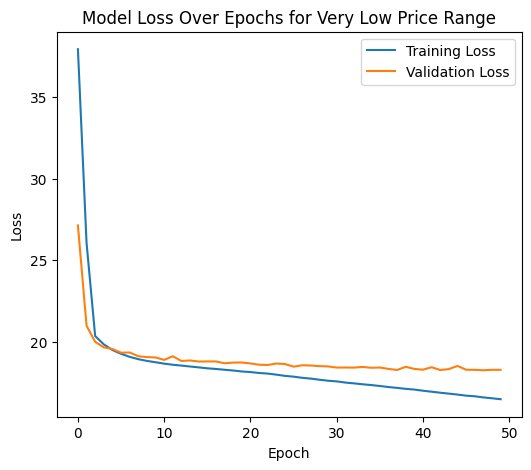

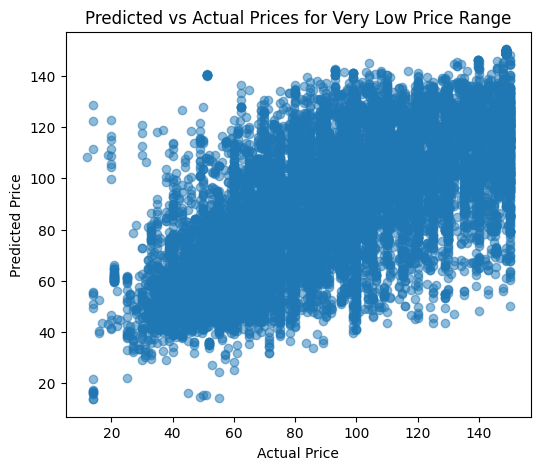


Processing Price Range: Low


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\237809045.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1045/1045 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 187.0457 - val_loss: 129.5588
Epoch 2/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 112.3528 - val_loss: 60.9163
Epoch 3/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 50.8220 - val_loss: 36.5305
Epoch 4/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 35.7351 - val_loss: 34.8457
Epoch 5/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 35.2366 - val_loss: 34.7910
Epoch 6/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 35.2507 - val_loss: 34.7833
Epoch 7/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 34.9230 - val_loss: 33.3860
Epoch 8/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 33.3224 - val_loss: 32.8115
Epoch 9/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 33.1600 - val_loss: 32.6285
Epoch 10/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 32.9196 - val_loss: 32.5784
Epoch 11/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 32.8231 - val_loss: 32.5236
Epoch 12/50
1045

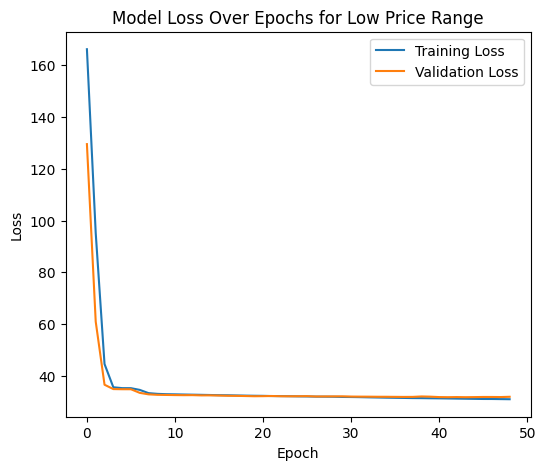

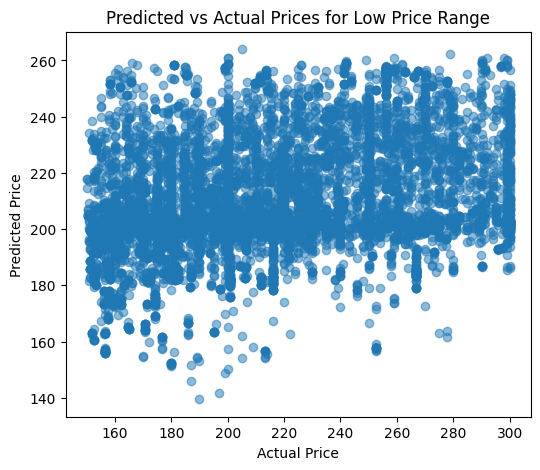


Processing Price Range: Medium


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\237809045.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 379.5624 - val_loss: 362.9525
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 355.8114 - val_loss: 346.5182
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 339.1969 - val_loss: 330.8335
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 324.0770 - val_loss: 315.4259
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 308.3239 - val_loss: 300.1674
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 292.3366 - val_loss: 285.0048
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 277.5571 - val_loss: 269.9090
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 263.1330 - val_loss: 254.8620
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 248.8836 - val_loss: 239.8514
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 234.1593 - val_loss: 224.8685
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 218.9932 - val_loss: 209.9069
Epoch 12/50
230/230

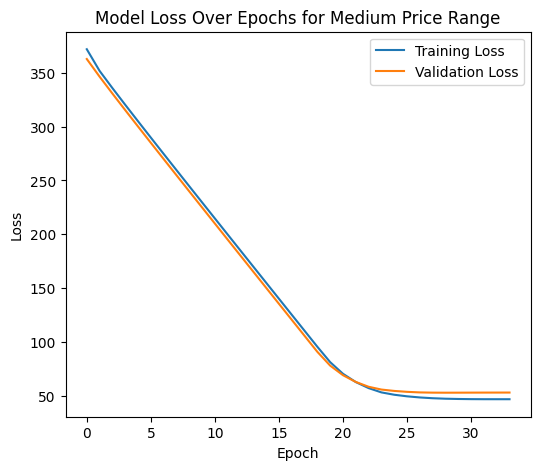

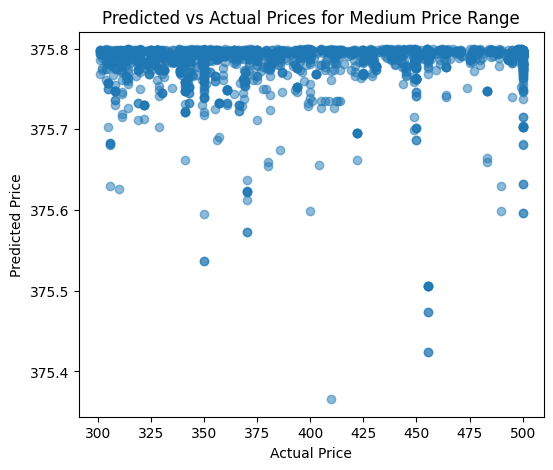


Processing Price Range: High


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\237809045.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 694.7657 - val_loss: 693.7610
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 677.2877 - val_loss: 685.3036
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 671.7056 - val_loss: 678.2858
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 663.8024 - val_loss: 671.6179
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 660.0900 - val_loss: 665.1197
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 646.4507 - val_loss: 658.7269
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 642.8986 - val_loss: 652.4047
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 640.9684 - val_loss: 646.1323
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 630.8010 - val_loss: 639.8974
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 625.1246 - val_loss: 633.6916
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 617.3218 - val_loss: 627.5094
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s

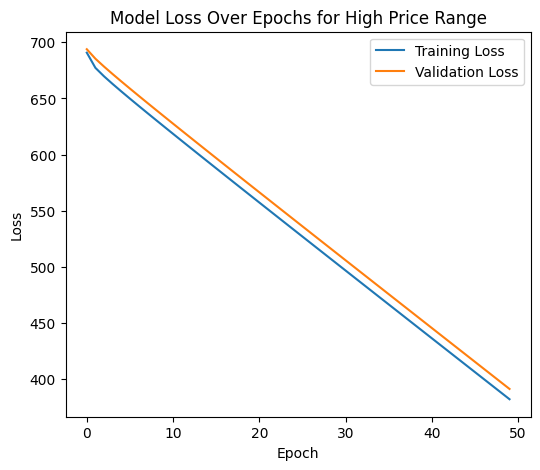

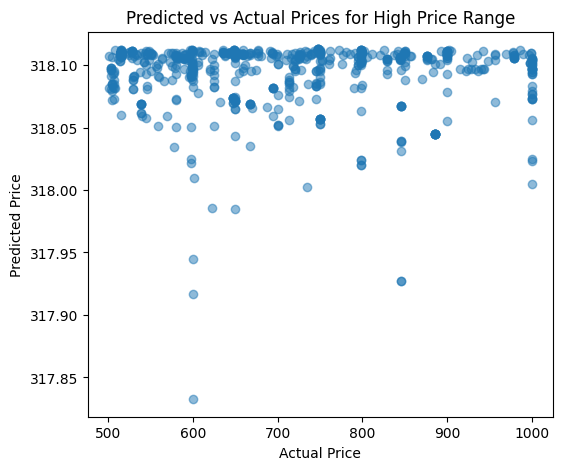


Processing Price Range: Very High


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\237809045.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2472.4075 - val_loss: 1901.9178
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2494.6914 - val_loss: 1897.2996
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2480.2148 - val_loss: 1891.6018
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2438.1892 - val_loss: 1888.2336
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2469.0325 - val_loss: 1885.9375
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2314.9263 - val_loss: 1883.9456
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2414.0142 - val_loss: 1882.0842
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2434.4109 - val_loss: 1880.3159
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2473.4282 - val_loss: 1878.6056
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2424.8748 - val_loss: 1876.9362
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2478.6946 - val_loss: 1875.2972
Epoch 12/50
22/22 

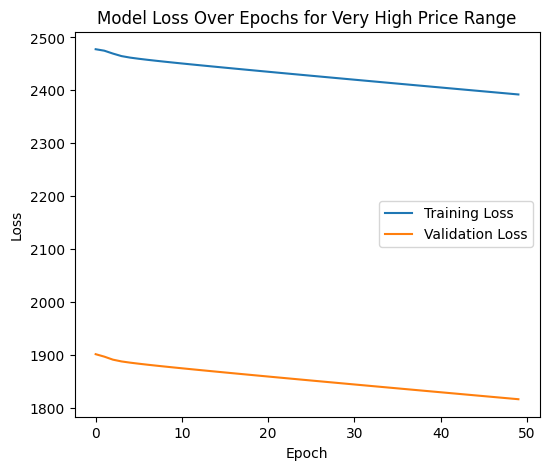

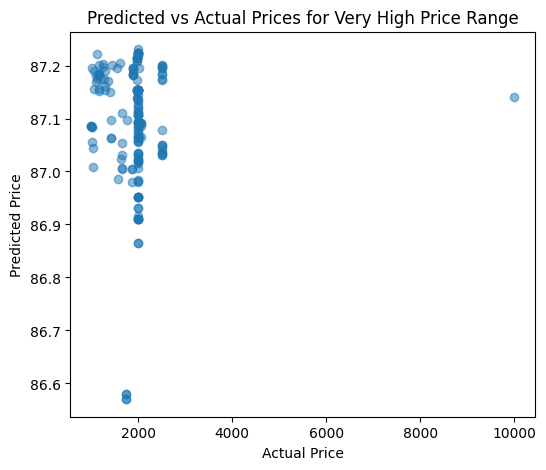

In [90]:

features = [
  'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
  'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
  'maximum_nights_avg_ntm', 'availability_30', 'number_of_reviews',
  'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count',
  'property', 'new_host', 'host_response_score', 'host_score',
  'property_description_score', 'count_amenities'
]
target = 'price'
sequence_length = 3  # Using previous 3 months to predict the next month


def create_sequences(df, mean_feature_values):
  X_sequences = []
  y_targets = []
  
  grouped = df.groupby('id')
  
  for name, group in grouped:
      group = group.sort_values('month')
      X = group[features].values
      y = group[target].values
      
      for i in range(len(X)):
          end_ix = i + sequence_length
          if end_ix >= len(X):
              break
          seq_X = X[i:end_ix]
          seq_y = y[end_ix]
          if seq_X.shape[0] < sequence_length:
              # Pad with mean feature values
              padding = np.tile(mean_feature_values, (sequence_length - seq_X.shape[0], 1))
              seq_X = np.vstack((padding, seq_X))
          X_sequences.append(seq_X)
          y_targets.append(seq_y)
  
  X = np.array(X_sequences)
  y = np.array(y_targets)
  
  return X, y

def preprocess_and_create_sequences(df, price_range_label):
  # Ensure 'month' is datetime
  df['month'] = pd.to_datetime(df['month'])
  
  # Drop rows with missing values
  df = df.dropna(subset=[target] + ['neighbourhood_cleansed', 'property_type'] + features)

  
  # Sort by 'id' and 'month'
  df = df.sort_values(['id', 'month'])
  
  # Encode 'property' if necessary
  if df['property'].dtype == 'object':
      df['property'] = df['property'].astype('category').cat.codes
  
  # Scale features (but not the target variable)
  scaler = MinMaxScaler()
  df[features] = scaler.fit_transform(df[features])
  
  # Split data into training and validation before computing mean
  grouped = df.groupby('id')
  ids = df['id'].unique()
  train_ids, val_ids = train_test_split(ids, test_size=0.2, random_state=42)
  
  df_train = df[df['id'].isin(train_ids)]
  df_val = df[df['id'].isin(val_ids)]
  
  # Compute mean feature values from training data only
  mean_feature_values = df_train[features].mean().values
  
  # Create sequences
  X_train, y_train = create_sequences(df_train, mean_feature_values)
  X_val, y_val = create_sequences(df_val, mean_feature_values)
  
  return X_train, y_train, X_val, y_val

def build_and_train_model(X_train, y_train, X_val, y_val):
  model = Sequential()
  # Removed Masking layer since we're padding with mean feature values
  model.add(LSTM(64, input_shape=(sequence_length, X_train.shape[2])))
  model.add(Dense(1))
  
  model.compile(loss='mae', optimizer='adam')
  
  early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss', patience=5, restore_best_weights=True
  )
  
  history = model.fit(
      X_train, y_train,
      epochs=50,
      batch_size=32,
      validation_data=(X_val, y_val),
      callbacks=[early_stopping],
      verbose=1
  )
  
  return model, history

# Process each price range
results = {}

for price_range, df_price_range in price_range_dfs.items():
  print(f"\nProcessing Price Range: {price_range}")
  
  # Preprocess data and create sequences with mean padding
  X_train, y_train, X_val, y_val = preprocess_and_create_sequences(df_price_range, price_range)
  
  # Check if there is enough data to build a model
  if X_train.shape[0] < 10:
      print(f"Not enough data to build a model for price range {price_range}.")
      continue
  
  # Build and train model
  model, history = build_and_train_model(X_train, y_train, X_val, y_val)
  
  # Make predictions
  y_pred = model.predict(X_val)
  
  # Evaluate the model
  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  mae = mean_absolute_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)
  
  print("Evaluation Metrics:")
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R2 Score: {r2}")
  
  # Store results
  results[price_range] = {
      'model': model,
      'history': history,
      'rmse': rmse,
      'mae': mae,
      'r2_score': r2,
      'X_val': X_val,
      'y_val': y_val,
      'y_pred': y_pred
  }
  
  # Plot training history
  plt.figure(figsize=(6,5))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'Model Loss Over Epochs for {price_range} Price Range')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()
  
  # Plot predicted vs actual prices
  plt.figure(figsize=(6,5))
  plt.scatter(y_val, y_pred, alpha=0.5)
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title(f'Predicted vs Actual Prices for {price_range} Price Range')
  plt.show()


## With Masking


Processing Price Range: Very Low


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\4136967356.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2116/2116 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 52.5427 - val_loss: 27.1502
Epoch 2/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 27.1328 - val_loss: 21.2371
Epoch 3/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 20.7410 - val_loss: 20.0086
Epoch 4/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 19.9625 - val_loss: 19.7800
Epoch 5/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 19.6563 - val_loss: 19.4322
Epoch 6/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 19.3582 - val_loss: 19.5100
Epoch 7/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 19.0851 - val_loss: 19.3754
Epoch 8/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 18.9936 - val_loss: 19.1365
Epoch 9/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 18.8482 - val_loss: 19.0161
Epoch 10/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 18.7947 - val_loss: 19.0167
Epoch 11/50
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 18.7102 - val_loss: 19.0442
Epoch 12/50
2116/2

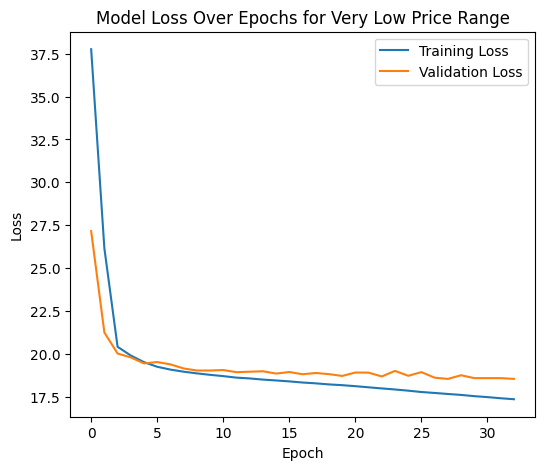

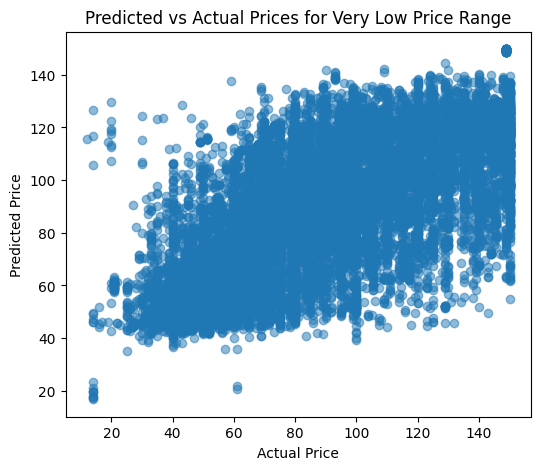


Processing Price Range: Low


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\4136967356.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1045/1045 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 187.1113 - val_loss: 130.0177
Epoch 2/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 112.7753 - val_loss: 61.3623
Epoch 3/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 51.2650 - val_loss: 36.5584
Epoch 4/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 35.9889 - val_loss: 34.8458
Epoch 5/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 35.2416 - val_loss: 34.7940
Epoch 6/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 35.2461 - val_loss: 34.7791
Epoch 7/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 34.7958 - val_loss: 33.4571
Epoch 8/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 33.3621 - val_loss: 32.8482
Epoch 9/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 33.0136 - val_loss: 32.7567
Epoch 10/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 32.9752 - val_loss: 32.5592
Epoch 11/50
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 32.8414 - val_loss: 32.5317
Epoch 12/50
1045

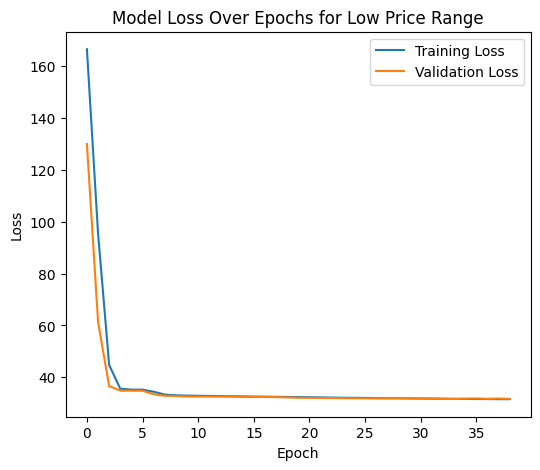

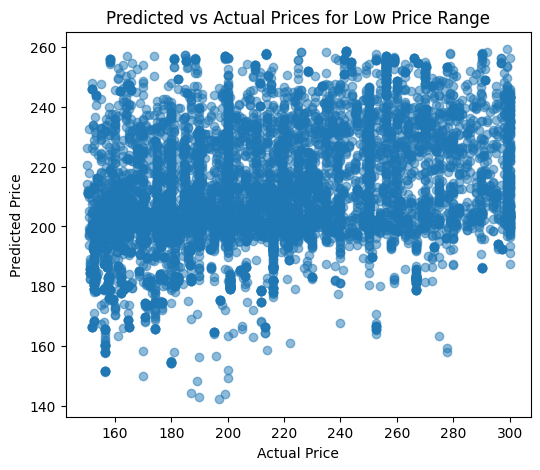


Processing Price Range: Medium


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\4136967356.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 381.3361 - val_loss: 364.3914
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 355.8315 - val_loss: 348.0754
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 342.1964 - val_loss: 332.4531
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 326.5280 - val_loss: 317.0814
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 310.0137 - val_loss: 301.8470
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 295.8819 - val_loss: 286.7022
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 280.8482 - val_loss: 271.6202
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 264.7614 - val_loss: 256.5840
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 249.0422 - val_loss: 241.5820
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 234.5057 - val_loss: 226.6059
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 219.8355 - val_loss: 211.6499
Epoch 12/50
230/230

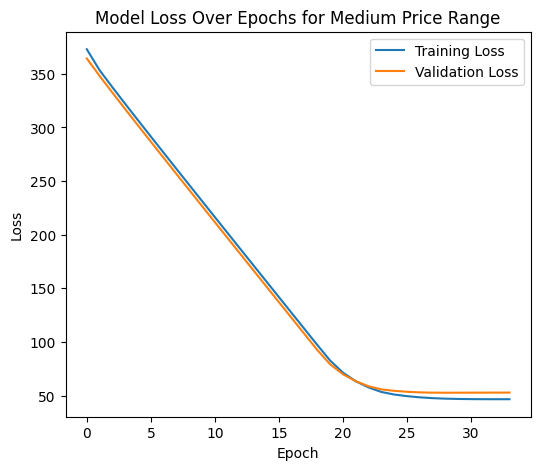

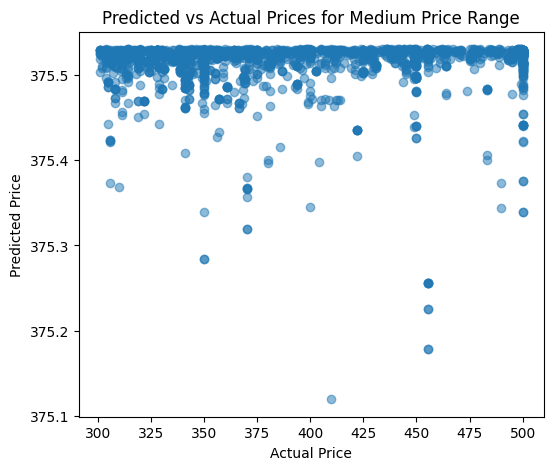


Processing Price Range: High


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\4136967356.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 691.9921 - val_loss: 692.8704
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 675.3115 - val_loss: 684.5091
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 669.3275 - val_loss: 677.4730
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 663.6245 - val_loss: 670.8041
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 656.3605 - val_loss: 664.3080
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 650.3692 - val_loss: 657.9152
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 644.4052 - val_loss: 651.5903
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 638.2499 - val_loss: 645.3136
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 631.4520 - val_loss: 639.0743
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 625.6019 - val_loss: 632.8647
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 614.9313 - val_loss: 626.6792
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s

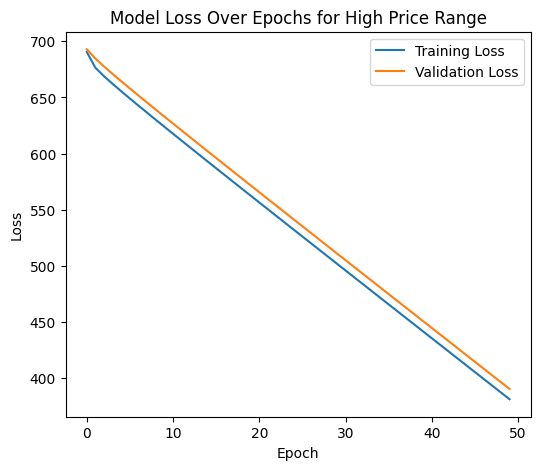

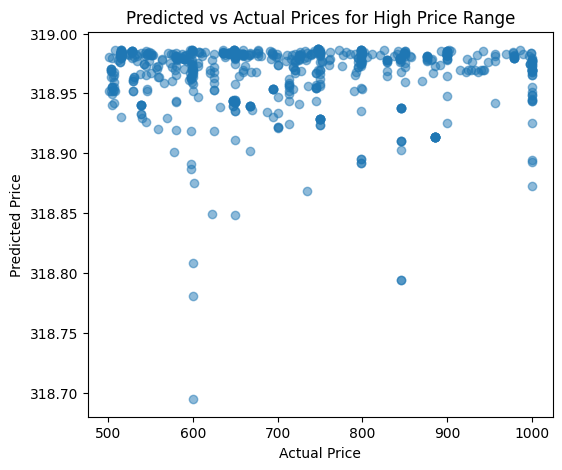


Processing Price Range: Very High


C:\Users\prabh\AppData\Local\Temp\ipykernel_26332\4136967356.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/50


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2456.8828 - val_loss: 1902.5065
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2542.8013 - val_loss: 1897.9464
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2441.0522 - val_loss: 1891.7479
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2474.8037 - val_loss: 1888.1382
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2454.4224 - val_loss: 1885.7697
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2407.2734 - val_loss: 1883.7493
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2466.7268 - val_loss: 1881.8817
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2488.6267 - val_loss: 1880.1031
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2345.5979 - val_loss: 1878.3827
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2389.7725 - val_loss: 1876.7043
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2421.8389 - val_loss: 1875.0575
Epoch 12/50
22/22 

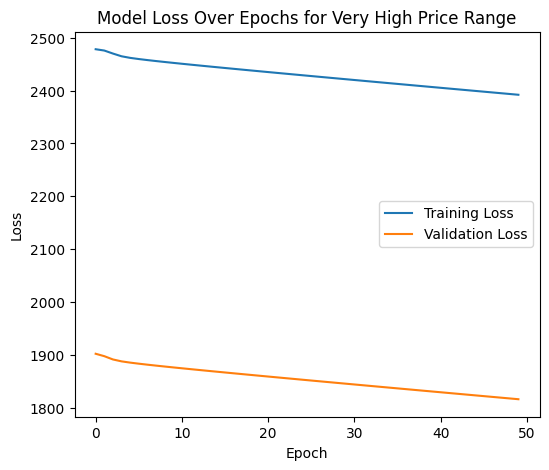

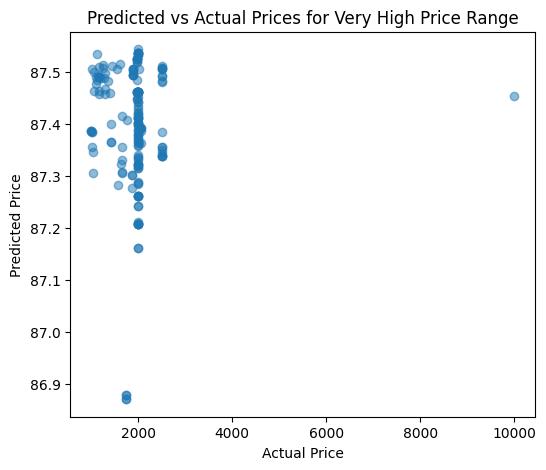

In [91]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

features = [
  'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
  'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
  'maximum_nights_avg_ntm', 'availability_30', 'number_of_reviews',
  'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count',
  'property', 'new_host', 'host_response_score', 'host_score',
  'property_description_score', 'count_amenities'
]
target = 'price'
sequence_length = 3  # Using previous 3 months to predict the next month

def create_sequences1(df):
  X_sequences = []
  y_targets = []

  grouped = df.groupby('id')

  for name, group in grouped:
      group = group.sort_values('month')
      X = group[features].values
      y = group[target].values

      for i in range(len(X)):
          end_ix = i + sequence_length
          if end_ix >= len(X):
              break
          seq_X = X[i:end_ix]
          seq_y = y[end_ix]
          if seq_X.shape[0] < sequence_length:
              # Pad with zeros
              padding = np.zeros((sequence_length - seq_X.shape[0], seq_X.shape[1]))
              seq_X = np.vstack((padding, seq_X))
          X_sequences.append(seq_X)
          y_targets.append(seq_y)

  X = np.array(X_sequences)
  y = np.array(y_targets)

  return X, y

def preprocess_and_create_sequences1(df, price_range_label):
  # Ensure 'month' is datetime
  df['month'] = pd.to_datetime(df['month'])

  # Drop rows with missing values
  df = df.dropna(subset=[target] + ['neighbourhood_cleansed', 'property_type'] + features)

  # Sort by 'id' and 'month'
  df = df.sort_values(['id', 'month'])

  # Encode 'property' if necessary
  if df['property'].dtype == 'object':
      df['property'] = df['property'].astype('category').cat.codes

  # Encode 'neighbourhood_cleansed' and 'property_type'
  df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category').cat.codes
  df['property_type'] = df['property_type'].astype('category').cat.codes

  # Scale features (but not the target variable)
  scaler = MinMaxScaler()
  df[features] = scaler.fit_transform(df[features])

  # Split data into training and validation
  grouped = df.groupby('id')
  ids = df['id'].unique()
  train_ids, val_ids = train_test_split(ids, test_size=0.2, random_state=42)

  df_train = df[df['id'].isin(train_ids)]
  df_val = df[df['id'].isin(val_ids)]

  # Create sequences
  X_train, y_train = create_sequences1(df_train)
  X_val, y_val = create_sequences1(df_val)

  return X_train, y_train, X_val, y_val

def build_and_train_model1(X_train, y_train, X_val, y_val):
  model = Sequential()
  model.add(Masking(mask_value=0., input_shape=(sequence_length, X_train.shape[2])))
  model.add(LSTM(64))
  model.add(Dense(1))

  model.compile(loss='mae', optimizer='adam')

  early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss', patience=5, restore_best_weights=True
  )

  history = model.fit(
      X_train, y_train,
      epochs=50,
      batch_size=32,
      validation_data=(X_val, y_val),
      callbacks=[early_stopping],
      verbose=1
  )

  return model, history

# Process each price range
results1 = {}

for price_range, df_price_range in price_range_dfs.items():
  print(f"\nProcessing Price Range: {price_range}")

  # Preprocess data and create sequences with zero padding
  X_train, y_train, X_val, y_val = preprocess_and_create_sequences1(df_price_range, price_range)

  # Check if there is enough data to build a model
  if X_train.shape[0] < 10:
      print(f"Not enough data to build a model for price range {price_range}.")
      continue

  # Build and train model
  model, history = build_and_train_model1(X_train, y_train, X_val, y_val)

  # Make predictions
  y_pred = model.predict(X_val)

  # Evaluate the model
  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  mae = mean_absolute_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)

  print("Evaluation Metrics:")
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R2 Score: {r2}")

  # Store results
  results1[price_range] = {
      'model': model,
      'history': history,
      'rmse': rmse,
      'mae': mae,
      'r2_score': r2,
      'X_val': X_val,
      'y_val': y_val,
      'y_pred': y_pred
  }

  # Plot training history
  plt.figure(figsize=(6,5))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'Model Loss Over Epochs for {price_range} Price Range')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

  # Plot predicted vs actual prices
  plt.figure(figsize=(6,5))
  plt.scatter(y_val, y_pred, alpha=0.5)
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title(f'Predicted vs Actual Prices for {price_range} Price Range')
  plt.show()
